<a href="https://colab.research.google.com/github/Amrutha57/123/blob/main/content_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# For visualizations to display properly in Jupyter Notebook
%matplotlib inline



In [3]:
# Load the dataset
file_id = "1BdDxvtTLJKhYpa6XGI5ryk5Yz7JjaCYz"
url = f"https://drive.google.com/uc?id={file_id}"  # Convert to direct link

df = pd.read_csv(url, encoding="ISO-8859-1")

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())


   Unnamed: 0  ID                           Title  Year  Age  IMDb  \
0           0   1                       Inception  2010  13+   8.8   
1           1   2                      The Matrix  1999  18+   8.7   
2           2   3          Avengers: Infinity War  2018  13+   8.5   
3           3   4              Back to the Future  1985   7+   8.5   
4           4   5  The Good, the Bad and the Ugly  1966  18+   8.8   

  Rotten Tomatoes  Netflix  Hulu  Prime Video  Disney+  Type  \
0             87%        1     0            0        0     0   
1             87%        1     0            0        0     0   
2             84%        1     0            0        0     0   
3             96%        1     0            0        0     0   
4             97%        1     0            1        0     0   

                        Directors                            Genres  \
0               Christopher Nolan  Action,Adventure,Sci-Fi,Thriller   
1  Lana Wachowski,Lilly Wachowski                   

###### import warnings

#remove warnings
warnings.filterwarnings('ignore')
# Check for missing values
print(df.isnull().sum())

# Fill missing IMDb ratings with the median
df['IMDb'].fillna(df['IMDb'].median(), inplace=True)

# Fill missing Age with 'Unknown'
df['Age'].fillna('Unknown', inplace=True)

# Drop rows where Genres are missing
df = df.dropna(subset=['Genres'])

# Drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

# Verify the cleaned dataset
print(df.isnull().sum())


In [ ]:
# Display dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16130 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

In [ ]:
# Convert Rotten Tomatoes scores to numeric, removing the '%' symbol
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%').astype(float)

# Fill missing Rotten Tomatoes scores with the median
df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].median(), inplace=True)



<ipython-input-7-1dd20cfc73c6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rotten Tomatoes'].fillna(df['Rotten Tomatoes'].median(), inplace=True)


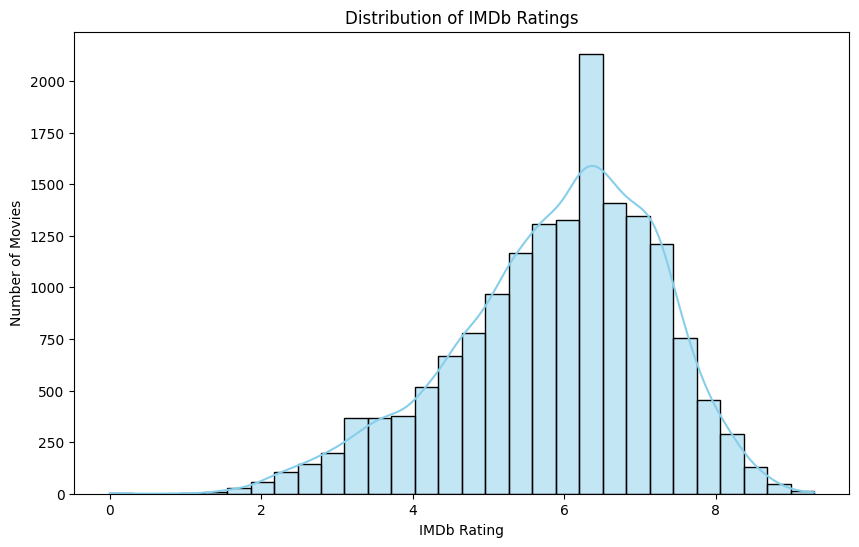

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDb'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of IMDb Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Number of Movies")
plt.show()


<ipython-input-10-7844275ad7ed>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[genre for genre, _ in genre_counts.most_common(10)],


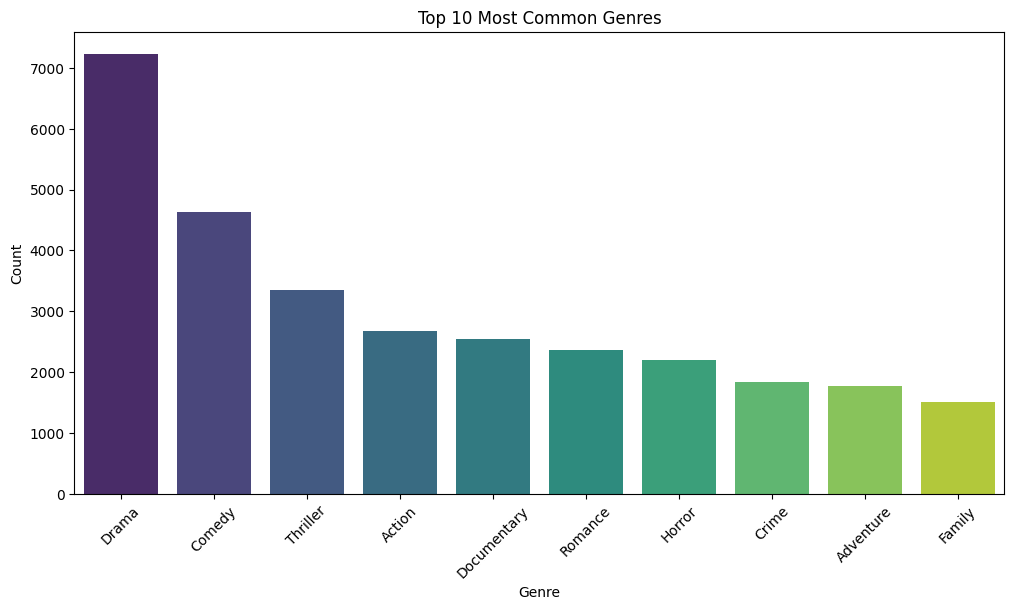

In [ ]:
from collections import Counter

# Ensure 'Genres' column has no NaN values
df['Genres'] = df['Genres'].dropna()

# Split and count genres
genres = df['Genres'].str.split(',')
all_genres = [genre.strip() for sublist in genres if isinstance(sublist, list) for genre in sublist]
genre_counts = Counter(all_genres)

# Plot the top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=[genre for genre, _ in genre_counts.most_common(10)],
            y=[count for _, count in genre_counts.most_common(10)],
            palette='viridis')

plt.title("Top 10 Most Common Genres")
plt.xticks(rotation=45)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [ ]:
# Replace NaN values in Genres with an empty string
df['Genres'] = df['Genres'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


<ipython-input-12-e46630fe4851>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='muted')


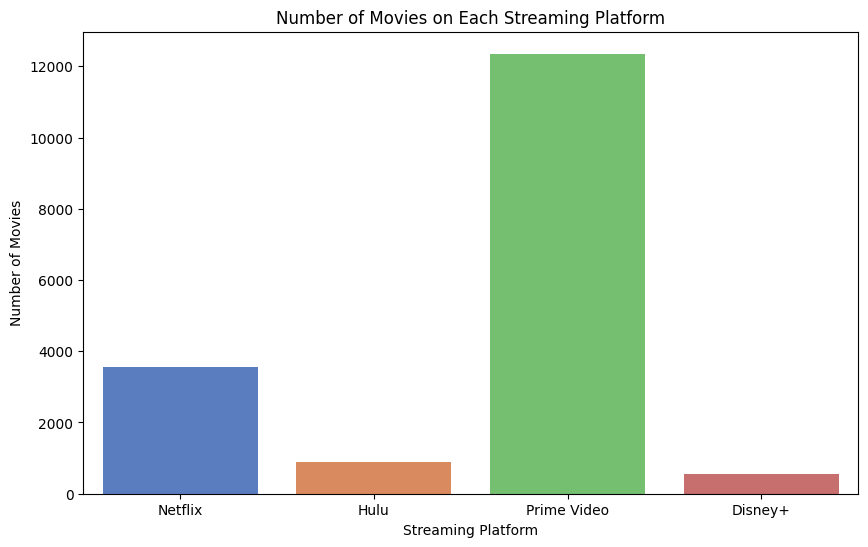

In [ ]:
platforms = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']
platform_counts = df[platforms].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='muted')
plt.title("Number of Movies on Each Streaming Platform")
plt.xlabel("Streaming Platform")
plt.ylabel("Number of Movies")
plt.show()


In [ ]:
# Replace NaN values in Genres with an empty string
df['Genres'] = df['Genres'].fillna('')

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Genres'])

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [ ]:
# Function to get recommendations based on a movie title
def recommend_movies(title, cosine_sim=cosine_sim, df=df):
    # Get the index of the movie that matches the title
    indices = pd.Series(df.index, index=df['Title']).drop_duplicates()
    if title not in indices:
        print(f"'{title}' not found in the dataset.")
        return None

    idx = indices[title]

    # Get the pairwise similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the top 10 similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 recommended movies
    return df[['Title', 'Year', 'IMDb', 'Genres']].iloc[movie_indices]

# Example: Get recommendations for "Inception"
recommendations = recommend_movies("The Matrix")
print(recommendations)


                                   Title  Year  IMDb         Genres
83                   The Matrix Reloaded  2003   7.2  Action,Sci-Fi
251               The Matrix Revolutions  2003   6.8  Action,Sci-Fi
298   Terminator 3: Rise of the Machines  2003   6.3  Action,Sci-Fi
649                  Battle: Los Angeles  2011   5.7  Action,Sci-Fi
1473            Illang: The Wolf Brigade  2018   6.0  Action,Sci-Fi
1985                        Battle Drone  2018   5.2  Action,Sci-Fi
2761                       Alien Warfare  2019   2.6  Action,Sci-Fi
3888                   Universal Soldier  1992   6.0  Action,Sci-Fi
4278                          Kill Order  2017   4.1  Action,Sci-Fi
5089                      Super Inframan  1975   6.3  Action,Sci-Fi


<ipython-input-15-fa9419ce7ade>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='IMDb', y='Title', data=recommendations, palette='coolwarm')


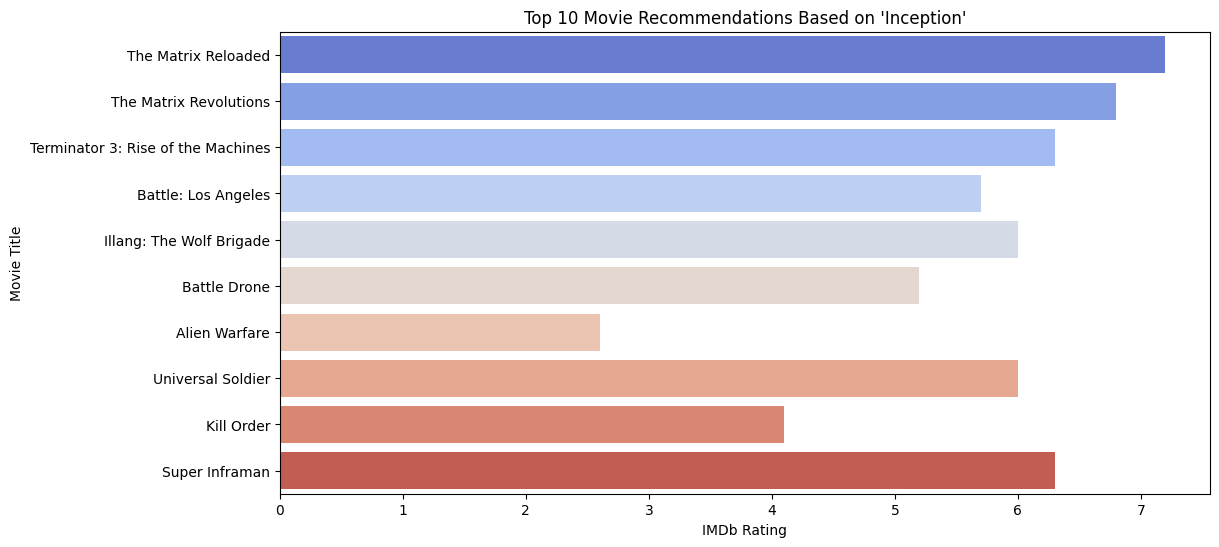

In [ ]:
# Check if recommendations are available before plotting
if recommendations is not None:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='IMDb', y='Title', data=recommendations, palette='coolwarm')
    plt.title("Top 10 Movie Recommendations Based on 'Inception'")
    plt.xlabel("IMDb Rating")
    plt.ylabel("Movie Title")
    plt.show()
